In [13]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


import ast
from ast import literal_eval

In [7]:
speakers = pd.read_csv("data/speaker_attribute.bz2", compression = 'bz2')

In [8]:
speakers.head()

,date_of_birth,nationality,gender,ethnic_group,occupation,party,academic_degree,id,label,candidacy,religion,climate
0,1952,['United Kingdom'],['male'],['White British'],"['writer', 'playwright', ""children's writer"", ...",[],[],Q42,Douglas Adams,[],[],0
1,1946,['United States of America'],['male'],[],"['financier', 'rugby union player', 'politicia...",['Republican Party'],[],Q207,George W. Bush,"['2000 United States presidential election', '...","['United Methodist Church', 'Episcopal Church'...",1
2,1945,"['Canada', 'United States of America']",['male'],[],"['singer', 'film actor', 'musician', 'autobiog...",[],[],Q633,Neil Young,[],[],0
3,1969,['Germany'],['male'],[],"['photographer', 'Wikimedian']",[],[],Q640,Harald Krichel,[],[],0
4,1932,"['Soviet Union', 'Russia']",['male'],[],"['film actor', 'theater director', 'film edito...",[],[],Q853,Andrei Tarkovsky,[],['Eastern Orthodox Church'],0


In [9]:
#function that removes the nan from the list of attributes 
def handle_nan(y) :
    try :
        return literal_eval(y)

    except Exception as e:
        y = y.replace("nan", "0")
        return literal_eval(y)

In [10]:
columns_eval = ['occupation','religion','nationality','ethnic_group','party','academic_degree', 'gender'] #our columns of interest
speakers[columns_eval].applymap(handle_nan) #application of the function

,occupation,religion,nationality,ethnic_group,party,academic_degree,gender
0,"[writer, playwright, children's writer, noveli...",[],[United Kingdom],[White British],[],[],[male]
1,"[financier, rugby union player, politician, mo...","[United Methodist Church, Episcopal Church, Me...",[United States of America],[],[Republican Party],[],[male]
2,"[singer, film actor, musician, autobiographer,...",[],"[Canada, United States of America]",[],[],[],[male]
3,"[photographer, Wikimedian]",[],[Germany],[],[],[],[male]
4,"[film actor, theater director, film editor, bi...",[Eastern Orthodox Church],"[Soviet Union, Russia]",[],[],[],[male]
...,...,...,...,...,...,...,...
2895031,[],[],[],[],[],[],[male]
2895032,[association football player],[],[],[],[],[],[]
2895033,"[scientist, university teacher]",[],[Belarus],[],[],[Doctor in Engineering],[male]
2895034,[American football player],[],[],[],[],[],[male]


In [11]:
#functions to create categorical columns  
def one_hot(list, column):
    for o in list: #Iterating over the list of genres. 
        speakers[f'{o}'] = 0 #Creating a new onehot feature column for each genre, filling it with False.
        speakers.loc[speakers[column].apply(lambda value : o in value), f'{o}'] = 1 #For each album, putting True in the 
    #onehot column corresponding to its genre. 

/var/folders/dp/xm3y4vf11sd5mzn0yd618jhm0000gn/T/ipykernel_3071/2642540982.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  speakers[f'{o}'] = 0 #Creating a new onehot feature column for each genre, filling it with False.
/var/folders/dp/xm3y4vf11sd5mzn0yd618jhm0000gn/T/ipykernel_3071/2642540982.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  speakers[f'{o}'] = 0 #Creating a new onehot feature column for each genre, filling it with False.
/var/folders/dp/xm3y4vf11sd5mzn0yd618jhm0000gn/T/ipykernel_3071/2642540982.py:4: P

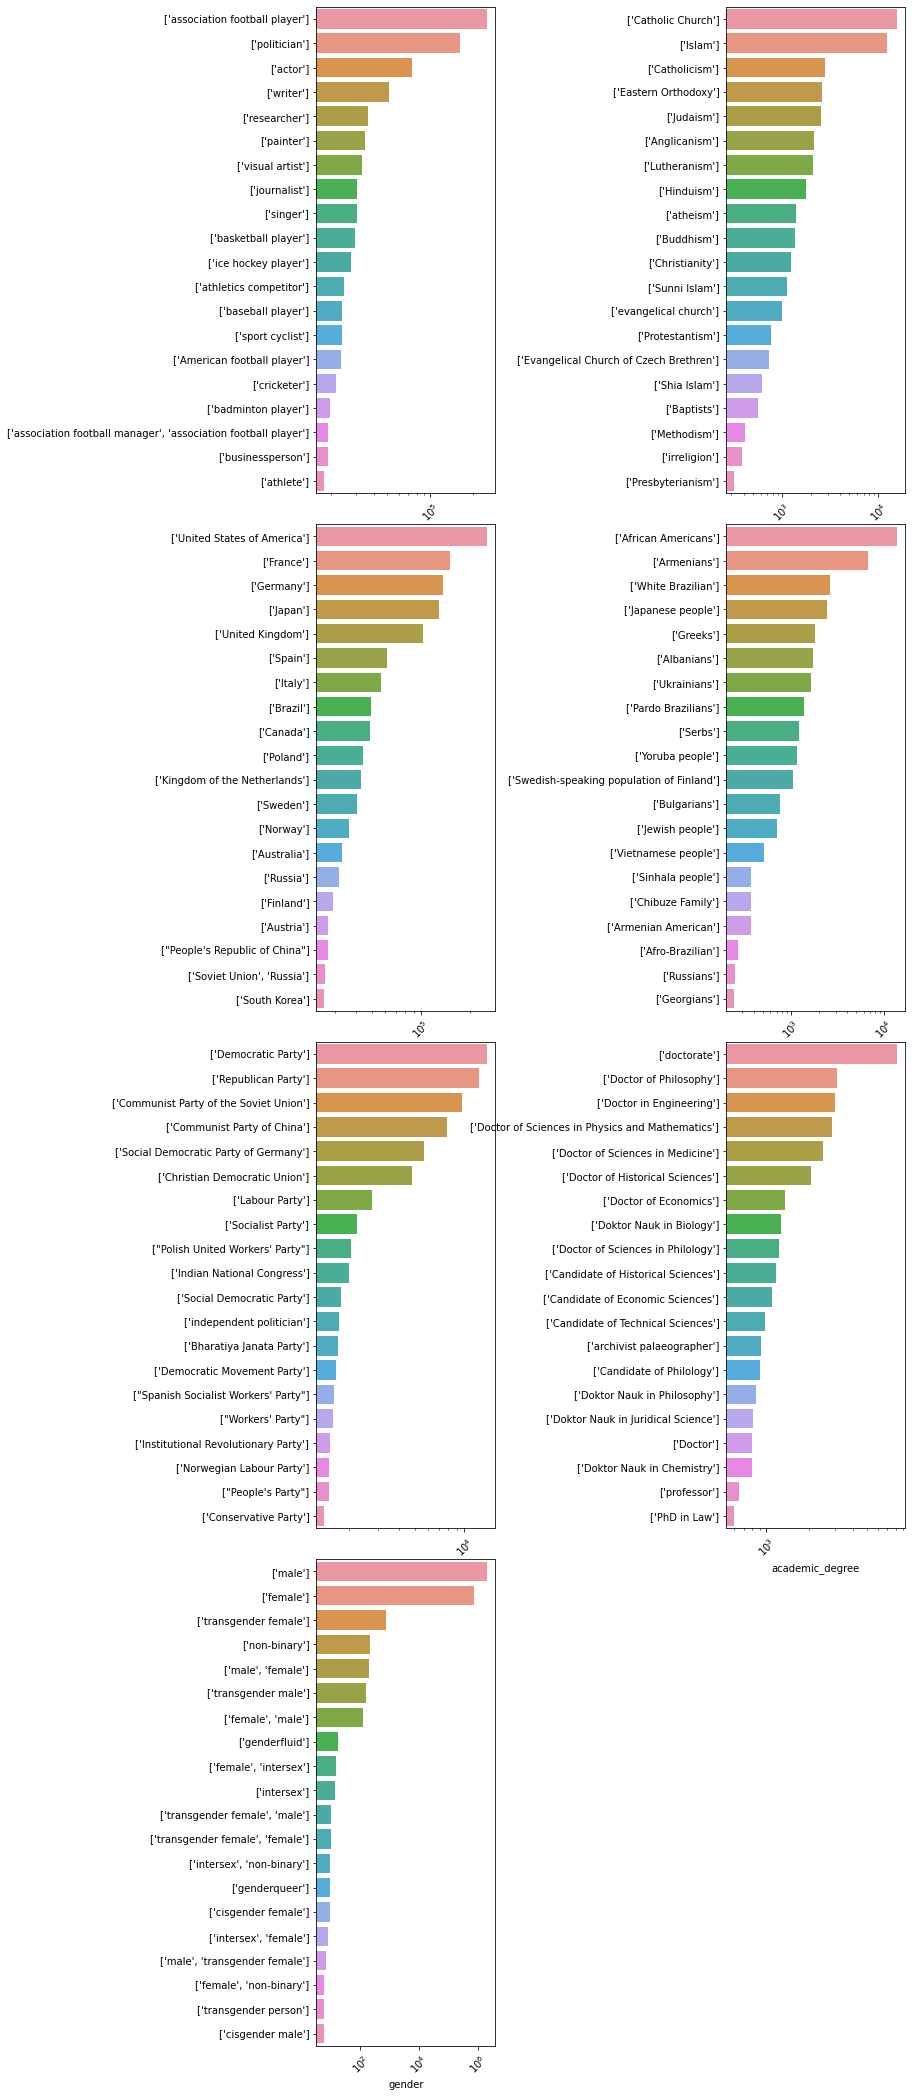

In [14]:
index = [[0,0],[0,1],[1,0],[1,1], [2,0], [2,1], [3,0]]

fig, axs = plt.subplots(4,2, figsize=(10,30))
fig.delaxes(axs[3, 1]) #The indexing is zero - based here
fig.tight_layout(pad=5, w_pad=20, h_pad=1)


for idx, column in enumerate(columns_eval): 
    
    subdata=speakers[column].explode().value_counts().drop('[]')
    sns.barplot(y= subdata.head(20).index, x = subdata.head(20), ax = axs[index[idx][0]][index[idx][1]])
    axs[index[idx][0]][index[idx][1]].tick_params(labelrotation=45, axis='x')
    axs[index[idx][0]][index[idx][1]].set(xscale='log')
    one_hot(subdata.index.tolist()[0:20], column)
    

plt.show()

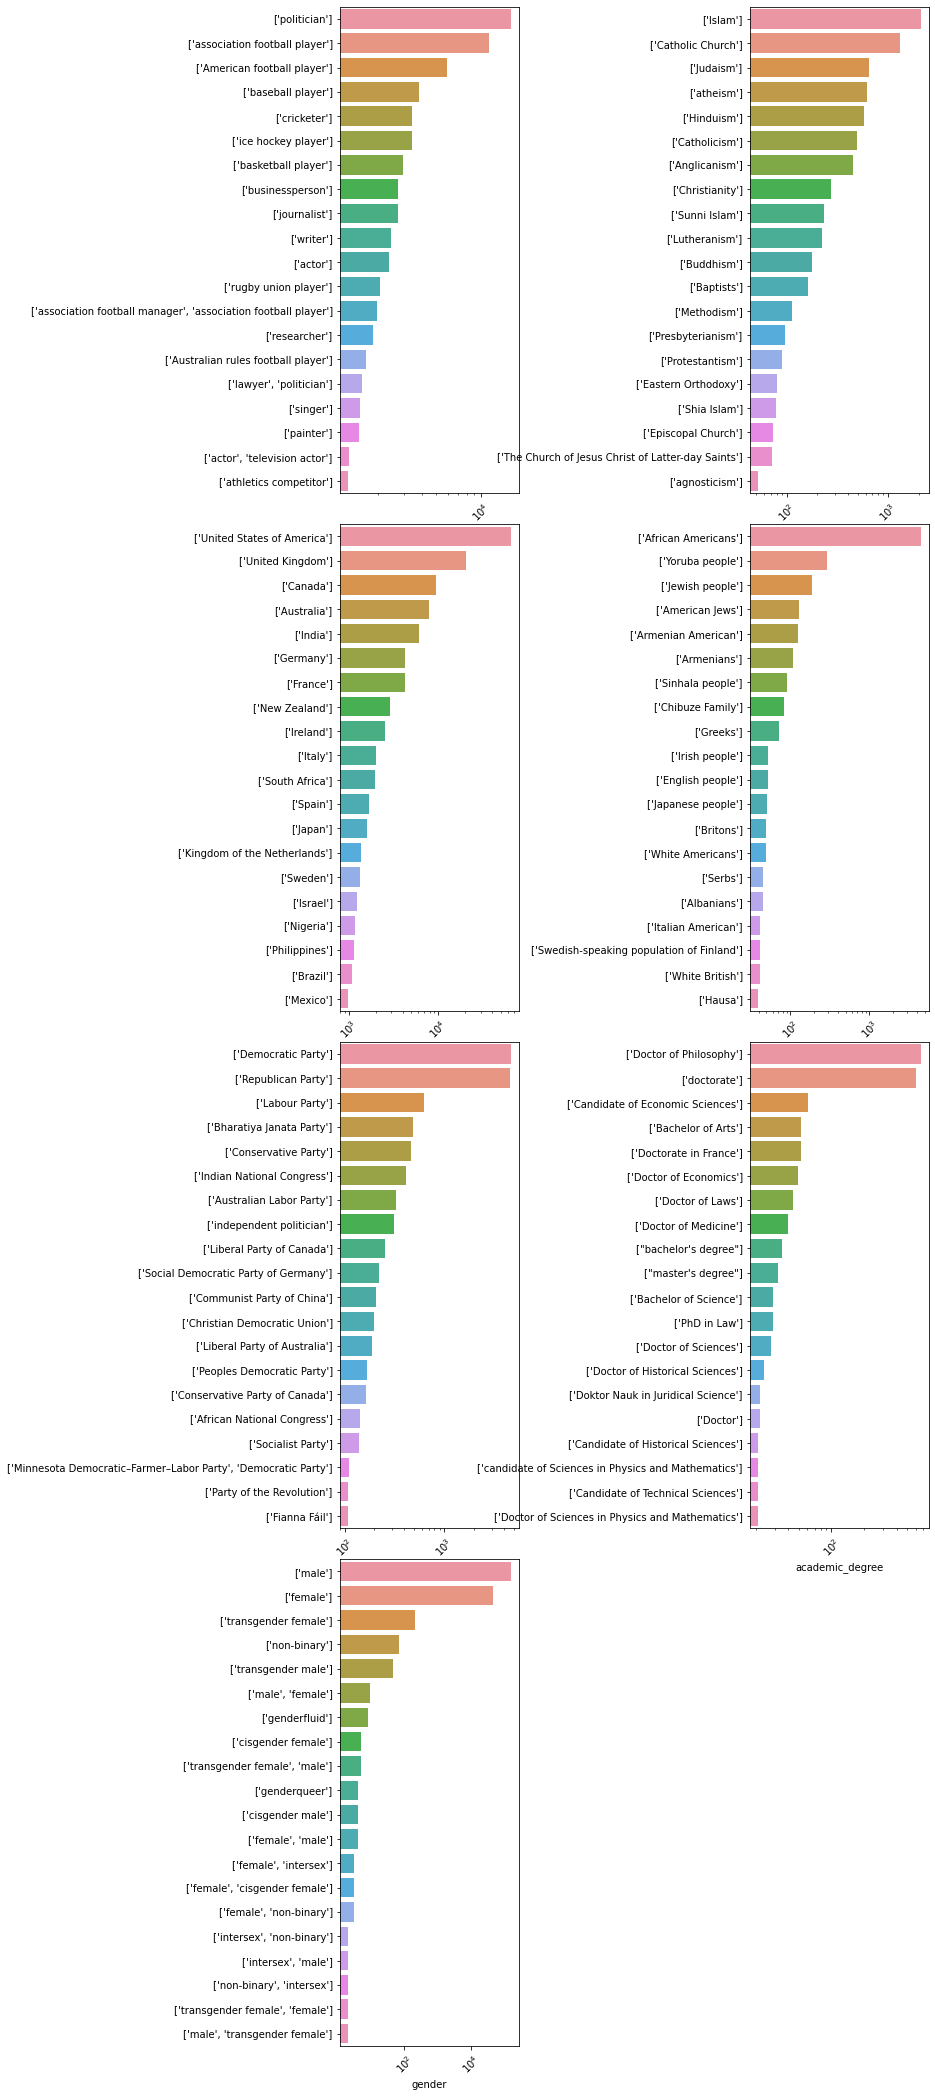

In [15]:
climate = speakers[speakers['climate']==1]
index = [[0,0],[0,1],[1,0],[1,1], [2,0], [2,1], [3,0]]

fig, axs = plt.subplots(4,2, figsize=(10,30))
fig.delaxes(axs[3, 1]) #The indexing is zero - based here
fig.tight_layout(pad=5, w_pad=20, h_pad=1)

for idx, column in enumerate(columns_eval): 
    
    subdata=climate[column].explode().value_counts().drop('[]')

    sns.barplot(y= subdata.head(20).index, x = subdata.head(20), ax = axs[index[idx][0]][index[idx][1]])
    axs[index[idx][0]][index[idx][1]].tick_params(labelrotation=45, axis='x')
    axs[index[idx][0]][index[idx][1]].set(xscale='log')



In [16]:
speakers.head(3)

,date_of_birth,nationality,gender,ethnic_group,occupation,party,academic_degree,id,label,candidacy,...,"['transgender female', 'male']","['transgender female', 'female']","['intersex', 'non-binary']",['genderqueer'],['cisgender female'],"['intersex', 'female']","['male', 'transgender female']","['female', 'non-binary']",['transgender person'],['cisgender male']
0,1952,['United Kingdom'],['male'],['White British'],"['writer', 'playwright', ""children's writer"", ...",[],[],Q42,Douglas Adams,[],...,0,0,0,0,0,0,0,0,0,0
1,1946,['United States of America'],['male'],[],"['financier', 'rugby union player', 'politicia...",['Republican Party'],[],Q207,George W. Bush,"['2000 United States presidential election', '...",...,0,0,0,0,0,0,0,0,0,0
2,1945,"['Canada', 'United States of America']",['male'],[],"['singer', 'film actor', 'musician', 'autobiog...",[],[],Q633,Neil Young,[],...,0,0,0,0,0,0,0,0,0,0


In [19]:
speakers.drop(['occupation', 'religion', 'nationality', 
               'ethnic_group', 'party', 'academic_degree', 'id', 'candidacy', 'label', 'gender'], axis=1).to_csv('data/one_hot.bz2', compression = 'bz2', index=False)